#### Charger ce dataset.
#### Utiliser les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset (nombre d'observations et de variables, types des variables, valeurs manquantes, etc.)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_excel('EDGAR-2020.xlsx')
print(dataset.head())

print("\nInformations de base sur le dataset :")
#print(dataset.info())
nb_observations = dataset.shape[0]
nb_variables = dataset.shape[1]
print("\nNombre d'observations :", nb_observations)
print("Nombre de variables :", nb_variables)
print("\nTypes des variables :")
print(dataset.dtypes)
print("\nValeurs manquantes :")
print(dataset.isnull().sum())

#### Mettre ce dataset sous forme 'tidy'.

In [2]:
# Mise en forme 'tidy'
dataset = pd.melt(dataset, id_vars=['Sector', 'Country'], value_vars=dataset.columns[2:], value_name='CO2_Emissions', var_name='Year')

print(dataset.head())

           Sector      Country  Year  CO2_Emissions
0  Power Industry  Afghanistan  1970       0.055674
1  Power Industry      Albania  1970       0.698291
2  Power Industry      Algeria  1970       1.646111
3  Power Industry       Angola  1970       0.137546
4  Power Industry     Anguilla  1970       0.000430


#### Utiliser la méthode 'groupby' de pandas (et éventuellement la méthode 'reset_index') pour créer les dataframes suivants :

    Un dataframe ayant pour variables le secteur, l'année et le total des émissions de tous les pays.
    Un dataframe ayant pour variables le pays, l'année et le total des émissions de tous les secteurs.
    Un dataframe ayant pour variables l'année et le total des émissions de tous les pays et de tous les secteurs.
    Un dataframe ayant pour variables le secteur et le total des émissions de tous les pays sur toutes les années.
    Un dataframe ayant pour variables le pays et le total des émissions de tous les secteurs sur toutes les années.

In [12]:
import pandas as pd
# Groupement par secteur et année, puis somme des émissions
dataset=pd.read_excel('EDGAR-2020.xlsx')
# Mise en forme 'tidy'
dataset = pd.melt(dataset, id_vars=['Sector', 'Country'], value_vars=dataset.columns[2:], value_name='CO2_Emissions', var_name='Year')
df1 = dataset.groupby(['Sector', 'Year']).sum().reset_index()

Dataframe avec le total des émissions par secteur et par année
      Sector  Year                                            Country  \
0  Buildings  1970  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
1  Buildings  1971  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
2  Buildings  1972  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
3  Buildings  1973  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
4  Buildings  1974  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   

   CO2_Emissions  
0    2926.555428  
1    2939.667943  
2    3059.887672  
3    3121.673689  
4    3039.178786  


In [152]:
# Groupement par pays et année, puis somme des émissions
df2 = dataset.groupby(['Country', 'Year']).sum().reset_index()
print("Dataframe avec le total des émissions par pays et par année")
print(df2.head())

Dataframe avec le total des émissions par pays et par année
       Country  Year                                             Sector  \
0  Afghanistan  1970  Power IndustryBuildingsTransportOther industri...   
1  Afghanistan  1971  Power IndustryBuildingsTransportOther industri...   
2  Afghanistan  1972  Power IndustryBuildingsTransportOther industri...   
3  Afghanistan  1973  Power IndustryBuildingsTransportOther industri...   
4  Afghanistan  1974  Power IndustryBuildingsTransportOther industri...   

   CO2_Emissions  
0       1.718206  
1       1.716487  
2       1.712408  
3       1.710739  
4       2.170061  


In [153]:
# Groupement par année, puis somme des émissions
df3 = dataset.groupby('Year').sum().reset_index()
print("Dataframe avec le total des émissions par année")
print(df3.head())

Dataframe avec le total des émissions par année
   Year                                             Sector  \
0  1970  Power IndustryPower IndustryPower IndustryPowe...   
1  1971  Power IndustryPower IndustryPower IndustryPowe...   
2  1972  Power IndustryPower IndustryPower IndustryPowe...   
3  1973  Power IndustryPower IndustryPower IndustryPowe...   
4  1974  Power IndustryPower IndustryPower IndustryPowe...   

                                             Country  CO2_Emissions  
0  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   15829.197736  
1  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   15782.710885  
2  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   16585.857919  
3  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   17563.935419  
4  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   17508.014530  


In [154]:
# Groupement par secteur, puis somme des émissions
df4 = dataset.groupby('Sector').sum().reset_index()
print("Dataframe avec le total des émissions par secteur")
print(df4.head())

Dataframe avec le total des émissions par secteur
                        Sector  \
0                    Buildings   
1  Other industrial combustion   
2                Other sectors   
3               Power Industry   
4                    Transport   

                                             Country      Year  CO2_Emissions  
0  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...  20959470  165890.452176  
1  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...  20959470  294442.093225  
2  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...  21162960  139991.654449  
3  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...  21061215  444332.135179  
4  International AviationInternational ShippingAf...  21264705  269061.142033  


In [155]:
# Groupement par pays, puis somme des émissions
df5 = dataset.groupby('Country').sum().reset_index()
print("Dataframe avec le total des émissions par pays")
print(df5.head())

Dataframe avec le total des émissions par pays
       Country                                             Sector    Year  \
0  Afghanistan  Power IndustryBuildingsTransportOther industri...  508725   
1      Albania  Power IndustryBuildingsTransportOther industri...  508725   
2      Algeria  Power IndustryBuildingsTransportOther industri...  508725   
3       Angola  Power IndustryBuildingsTransportOther industri...  508725   
4     Anguilla  Power IndustryBuildingsTransportOther industri...  508725   

   CO2_Emissions  
0     183.345100  
1     261.465752  
2    4454.510218  
3     863.218442  
4       0.635722  


#### Pour chacun des secteurs d'activité, mener l'étude suivante :

    Représenter par un nuage de points et par un "line plot" l'évolution au fil du temps des émissions.
    Calculer le coefficient de corrélation entre les années et les émissions.
    Calculer l'équation de la droite de régression. La tracer.
    Faire une prédiction pour 2030.

      Sector  Year                                            Country  \
0  Buildings  1970  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
1  Buildings  1971  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
2  Buildings  1972  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
3  Buildings  1973  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
4  Buildings  1974  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   

   CO2_Emissions  
0    2926.555428  
1    2939.667943  
2    3059.887672  
3    3121.673689  
4    3039.178786  


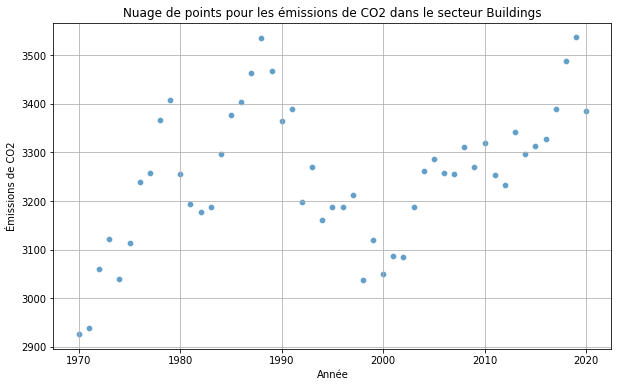

/tmp/ipykernel_842172/722890643.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='CO2_Emissions', data=data_secteur, estimator='mean', ci=None)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


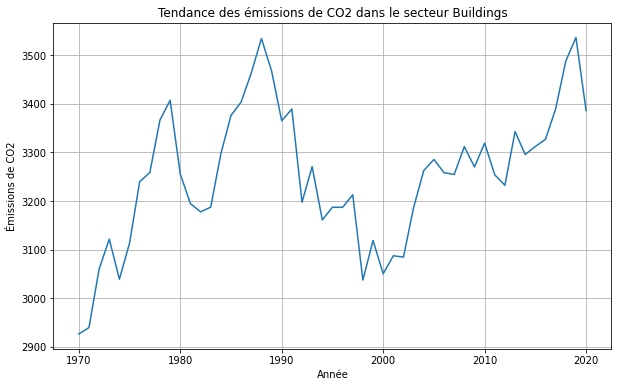

                         Sector  Year  \
51  Other industrial combustion  1970   
52  Other industrial combustion  1971   
53  Other industrial combustion  1972   
54  Other industrial combustion  1973   
55  Other industrial combustion  1974   

                                              Country  CO2_Emissions  
51  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...    4559.329247  
52  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...    4293.773168  
53  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...    4427.175023  
54  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...    4702.212331  
55  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...    4706.438362  


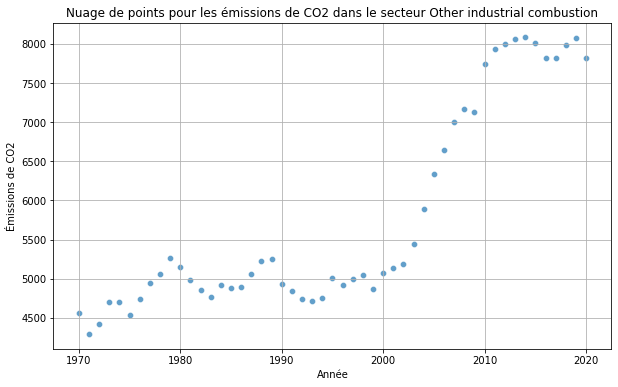

/tmp/ipykernel_842172/722890643.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='CO2_Emissions', data=data_secteur, estimator='mean', ci=None)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


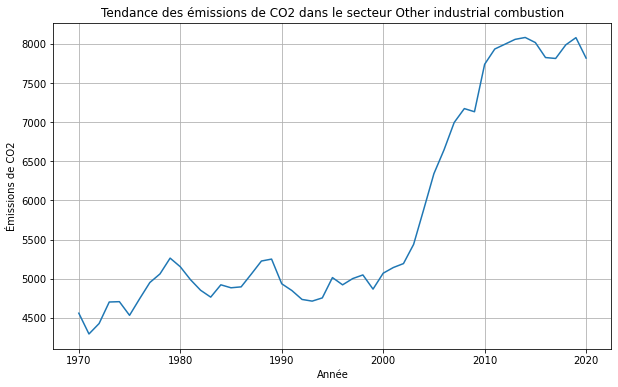

            Sector  Year                                            Country  \
102  Other sectors  1970  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
103  Other sectors  1971  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
104  Other sectors  1972  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
105  Other sectors  1973  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
106  Other sectors  1974  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   

     CO2_Emissions  
102    1851.515118  
103    1875.259516  
104    1991.057086  
105    2128.931684  
106    2108.541265  


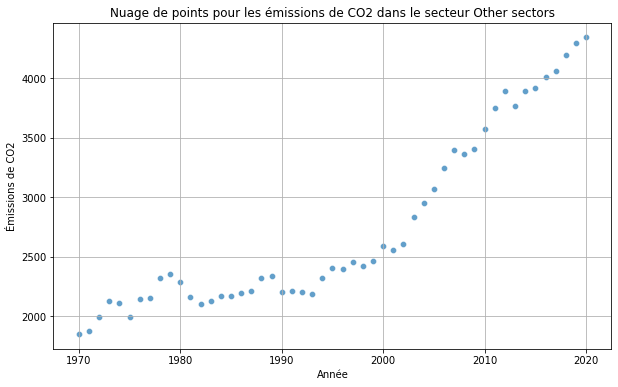

/tmp/ipykernel_842172/722890643.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='CO2_Emissions', data=data_secteur, estimator='mean', ci=None)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


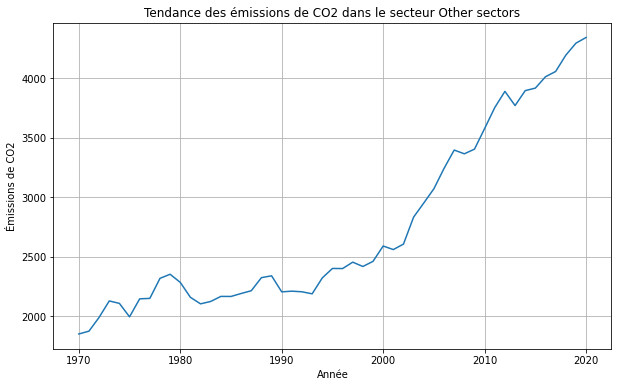

             Sector  Year                                            Country  \
153  Power Industry  1970  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
154  Power Industry  1971  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
155  Power Industry  1972  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
156  Power Industry  1973  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   
157  Power Industry  1974  AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...   

     CO2_Emissions  
153    3695.783031  
154    3797.794227  
155    4061.310571  
156    4388.431315  
157    4462.033257  


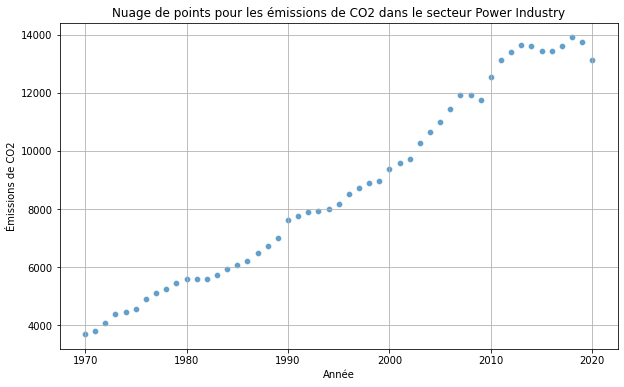

/tmp/ipykernel_842172/722890643.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='CO2_Emissions', data=data_secteur, estimator='mean', ci=None)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


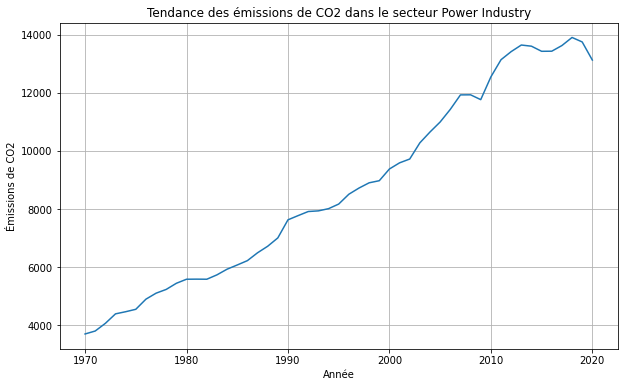

        Sector  Year                                            Country  \
204  Transport  1970  International AviationInternational ShippingAf...   
205  Transport  1971  International AviationInternational ShippingAf...   
206  Transport  1972  International AviationInternational ShippingAf...   
207  Transport  1973  International AviationInternational ShippingAf...   
208  Transport  1974  International AviationInternational ShippingAf...   

     CO2_Emissions  
204    2796.014912  
205    2876.216032  
206    3046.427567  
207    3222.686400  
208    3191.822860  


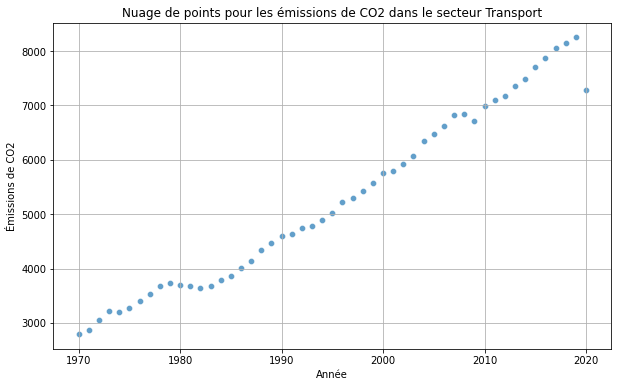

/tmp/ipykernel_842172/722890643.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='CO2_Emissions', data=data_secteur, estimator='mean', ci=None)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


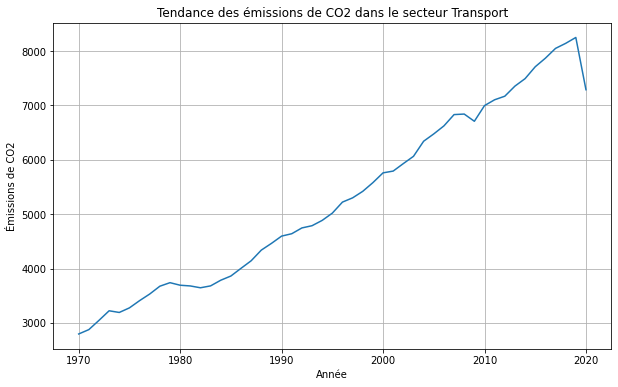

In [156]:
# Liste des secteurs uniques

secteurs = df1['Sector'].unique()

for secteur in secteurs:
    # Sélectionner les données pour le secteur actuel
    data_secteur = df1[df1['Sector'] == secteur]
    print(data_secteur.head())
    # Création du nuage de points
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Year', y='CO2_Emissions', data=data_secteur, alpha=0.7)
    plt.title(f'Nuage de points pour les émissions de CO2 dans le secteur {secteur}')
    plt.xlabel('Année')
    plt.ylabel('Émissions de CO2')
    plt.grid(True)
    plt.show()
    plt.close()
    # Création du line plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Year', y='CO2_Emissions', data=data_secteur, estimator='mean', ci=None)
    plt.title(f'Tendance des émissions de CO2 dans le secteur {secteur}')
    plt.xlabel('Année')
    plt.ylabel('Émissions de CO2')
    plt.grid(True)
    plt.show()
    plt.close()

In [157]:
for secteur in secteurs:
    data_secteur = df1[df1['Sector'] == secteur]
    # Supprimer les lignes avec des valeurs manquantes
    data_secteur_clean = data_secteur.dropna(subset=['Year', 'CO2_Emissions'])
    correlation = data_secteur_clean['Year'].corr(data_secteur_clean['CO2_Emissions'])
    print(f"Pour le secteur '{secteur}', le coefficient de corrélation entre les années et les émissions est : {correlation}")

Pour le secteur 'Buildings', le coefficient de corrélation entre les années et les émissions est : 0.38466194475484705
Pour le secteur 'Other industrial combustion', le coefficient de corrélation entre les années et les émissions est : 0.8661385458112272
Pour le secteur 'Other sectors', le coefficient de corrélation entre les années et les émissions est : 0.9171060108636844
Pour le secteur 'Power Industry', le coefficient de corrélation entre les années et les émissions est : 0.9903363101340149
Pour le secteur 'Transport', le coefficient de corrélation entre les années et les émissions est : 0.9894723255446832


Pour le secteur 'Buildings', le coefficient de corrélation de Pearson est : 0.38466194475484716


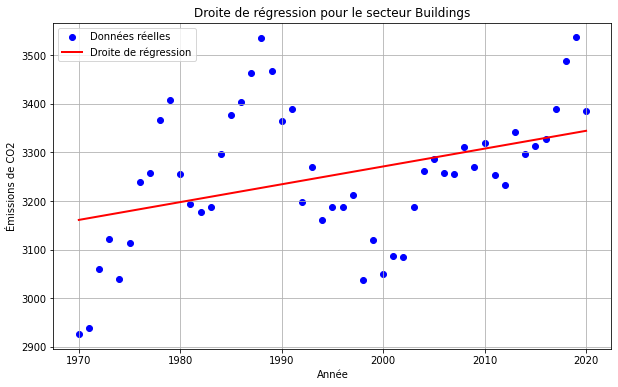

Pour le secteur 'Other industrial combustion', le coefficient de corrélation de Pearson est : 0.8661385458112274


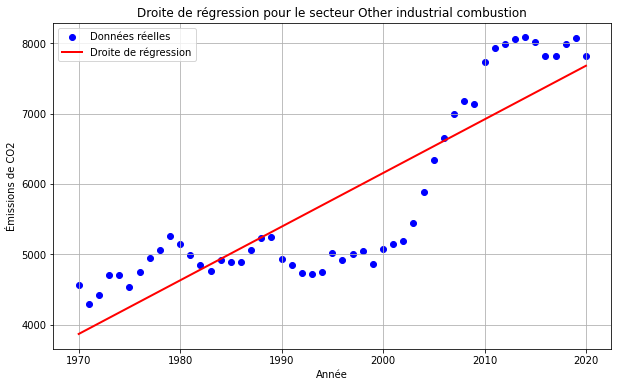

Pour le secteur 'Other sectors', le coefficient de corrélation de Pearson est : 0.9171060108636844


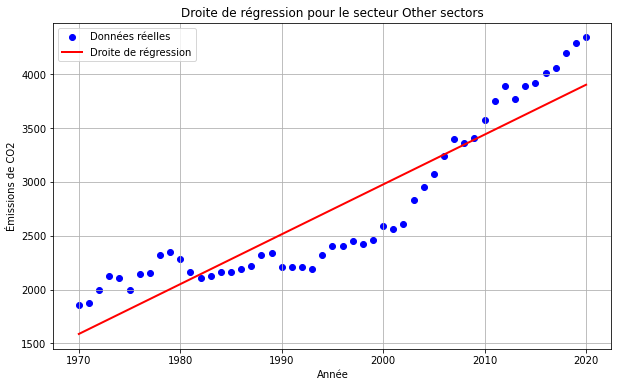

Pour le secteur 'Power Industry', le coefficient de corrélation de Pearson est : 0.9903363101340148


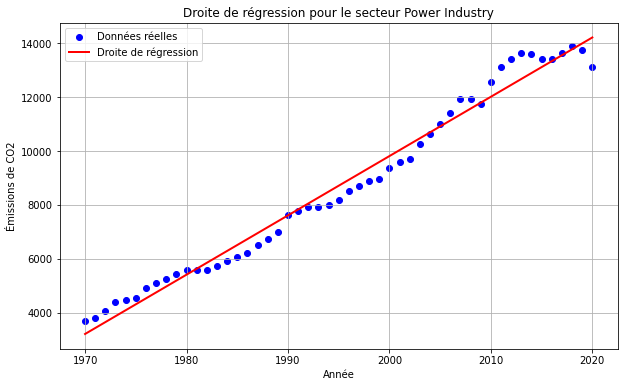

Pour le secteur 'Transport', le coefficient de corrélation de Pearson est : 0.9894723255446838


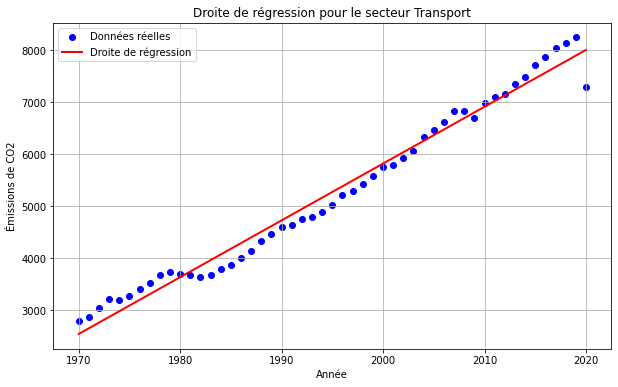

In [158]:
import numpy as np
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt

secteurs = df1['Sector'].unique()

for secteur in secteurs:
    data_secteur = df1[df1['Sector'] == secteur]
    data_secteur_clean = data_secteur.dropna(subset=['Year', 'CO2_Emissions'])
    X = data_secteur_clean['Year'].values
    Y = data_secteur_clean['CO2_Emissions'].values
    corr, _ = pearsonr(X, Y)
    
    #la régression linéaire
    pente, ord_origine, coeff_corr, valeur_p, erreur_std= linregress(X, Y)
    
    #le coefficient de corrélation de Pearson
    print(f"Pour le secteur '{secteur}', le coefficient de corrélation de Pearson est : {corr}")
    
    #l'équation de la droite de régression
    #print(f"Pour le secteur '{secteur}', l'équation de la droite de régression est : Y = {pente} * X + {ord_origine}")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color='blue', label='Données réelles')
    plt.plot(X, pente*X + ord_origine, color='red', linewidth=2, label='Droite de régression')
    plt.title(f'Droite de régression pour le secteur {secteur}')
    plt.xlabel('Année')
    plt.ylabel('Émissions de CO2')
    plt.legend()
    plt.grid(True)
    plt.show()


In [159]:
for secteur in secteurs:
    data_secteur = df1[df1['Sector'] == secteur]
    data_secteur_clean = data_secteur.dropna(subset=['Year', 'CO2_Emissions'])
    X = data_secteur_clean['Year'].values
    Y = data_secteur_clean['CO2_Emissions'].values
    
    # modèle de régression linéaire
    pente, ord_origine, coeff_corr, valeur_p, erreur_std = linregress(X, Y)
    
    # Prédiction pour l'année 2030
    annee = 2030
    prediction = pente * annee + ord_origine
    
    print(f"Prédiction pour le secteur '{secteur}' en 2030 : {prediction:.2f} ")


Prédiction pour le secteur 'Buildings' en 2030 : 3381.03 
Prédiction pour le secteur 'Other industrial combustion' en 2030 : 8442.27 
Prédiction pour le secteur 'Other sectors' en 2030 : 4366.22 
Prédiction pour le secteur 'Power Industry' en 2030 : 16424.98 
Prédiction pour le secteur 'Transport' en 2030 : 9103.77 


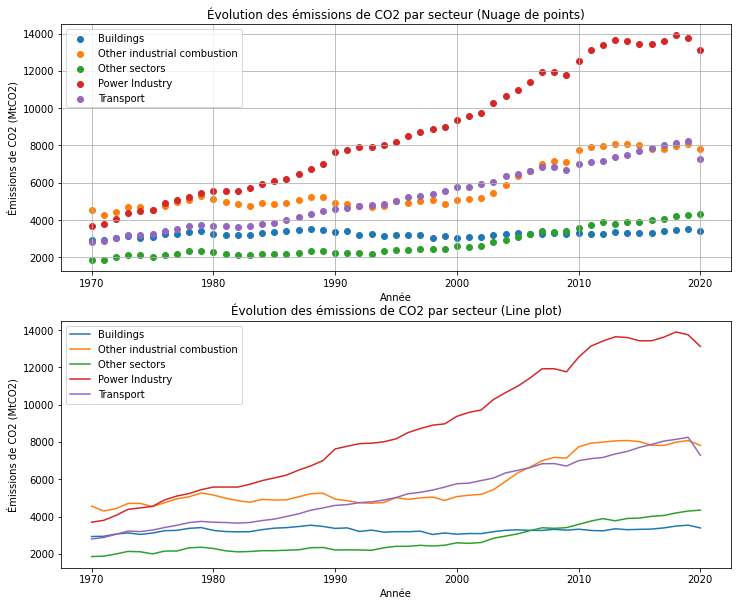

In [160]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Nuage de points
for secteur in secteurs:
    data_secteur = df1[df1['Sector'] == secteur]
    ax1.scatter(data_secteur['Year'], data_secteur['CO2_Emissions'], label=secteur)

ax1.set_title('Évolution des émissions de CO2 par secteur')
ax1.set_xlabel('Année')
ax1.set_ylabel('Émissions de CO2')
ax1.legend()
ax1.grid(True)

# Line plot
for secteur in secteurs:
    data_secteur = df1[df1['Sector'] == secteur]
    ax2.plot(data_secteur['Year'], data_secteur['CO2_Emissions'], label=secteur)

ax2.set_title('Évolution des émissions de CO2 par secteur')
ax2.set_xlabel('Année')
ax2.set_ylabel('Émissions de CO2 ')
ax2.legend()

plt.show()

In [173]:
# Filtrer les données pour la France
data_france = dataset[dataset['Country'] == 'France']
print(data_france)

Empty DataFrame
Columns: [Sector, Country, Year, CO2_Emissions]
Index: []


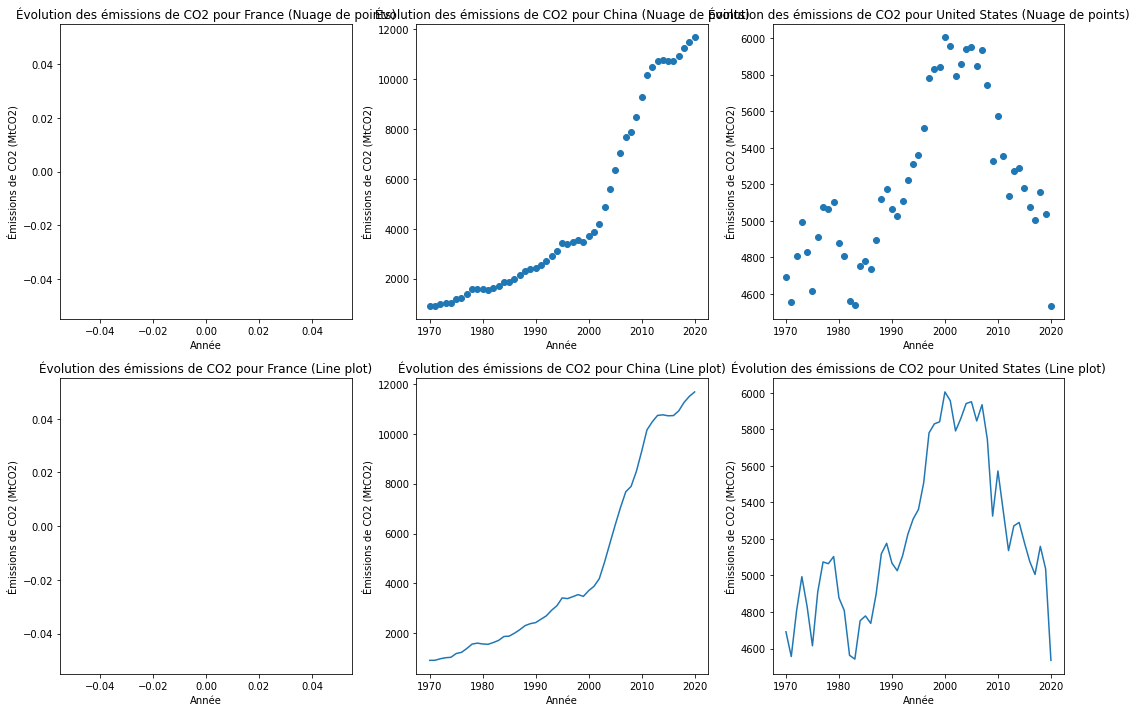

In [201]:
# Liste des pays à étudier
pays_etudier = ['France', 'China', 'United States']

fig, axs = plt.subplots(2, len(pays_etudier), figsize=(15, 10))

# Nuage de points
for i, pays in enumerate(pays_etudier):
    data_pays = df2[df2['Country'] == pays]
    axs[0, i].scatter(data_pays['Year'], data_pays['CO2_Emissions'])
    axs[0, i].set_title(f'Évolution des émissions de CO2 pour {pays} (Nuage de points)')
    axs[0, i].set_xlabel('Année')
    axs[0, i].set_ylabel('Émissions de CO2 (MtCO2)')
    

# Line plot
for i, pays in enumerate(pays_etudier):
    data_pays = df2[df2['Country'] == pays]
    axs[1, i].plot(data_pays['Year'], data_pays['CO2_Emissions'])
    axs[1, i].set_title(f'Évolution des émissions de CO2 pour {pays} (Line plot)')
    axs[1, i].set_xlabel('Année')
    axs[1, i].set_ylabel('Émissions de CO2 (MtCO2)')

plt.show()

In [193]:
# Liste des pays à étudier
pays_etudier = ['France', 'China', 'United States']

# Pour chaque pays
for pays in pays_etudier:
    # Filtrer les données pour le pays actuel
    data_pays = df2[df2['Country'] == pays]
    
    # Calculer le coefficient de corrélation entre les années et les émissions de CO2 pour le pays actuel
    correlation = data_pays['Year'].corr(data_pays['CO2_Emissions'])
    
    # Afficher le coefficient de corrélation pour le pays actuel
    print(f"Pour {pays}, le coefficient de corrélation entre les années et les émissions de CO2 est : {correlation}")

Pour France, le coefficient de corrélation entre les années et les émissions de CO2 est : nan
Pour China, le coefficient de corrélation entre les années et les émissions de CO2 est : 0.9355566601944332
Pour United States, le coefficient de corrélation entre les années et les émissions de CO2 est : 0.49336035197237793


In [195]:
from scipy.stats import linregress

# Pour chaque pays, sauf la France
for pays, data in pays_data.items():
    if pays != 'France':  
        # Supprimer les valeurs manquantes
        data_cleaned = data.dropna(subset=['Year', 'CO2_Emissions'])
        X = data_cleaned['Year'].values
        Y = data_cleaned['CO2_Emissions'].values
        #les coefficients de la droite de régression avec linregress
        slope, intercept, _, _, _ = linregress(X, Y)
        print(f"Équation de la droite de régression pour {pays}: Y = {slope:.2f} * X + {intercept:.2f}")


Équation de la droite de régression pour China: Y = 232.40 * X + -458939.43
Équation de la droite de régression pour United States: Y = 14.60 * X + -23912.94


Équation de la droite de régression pour China: Y = 232.40 * X + -458939.43


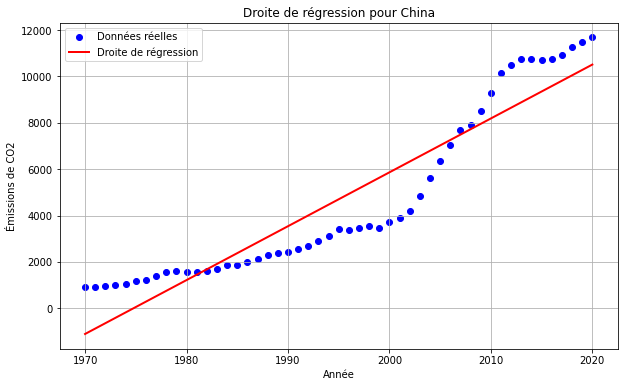

Équation de la droite de régression pour United States: Y = 14.60 * X + -23912.94


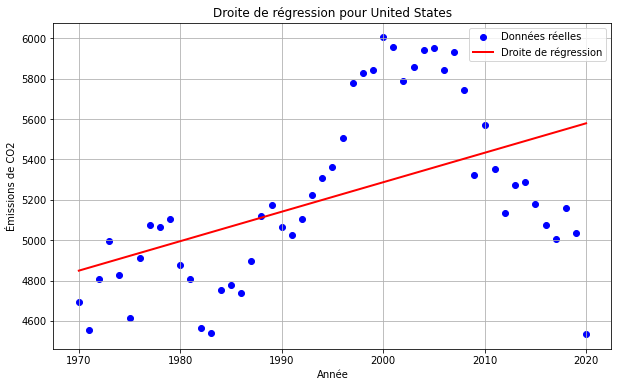

In [191]:
# Pour chaque pays, sauf la France
for pays, data in pays_data.items():
    if pays != 'France':  
        # Supprimer les valeurs manquantes
        data_cleaned = data.dropna(subset=['Year', 'CO2_Emissions'])
        X = data_cleaned['Year'].values
        Y = data_cleaned['CO2_Emissions'].values
        
        #les coefficients de la droite de régression avec linregress
        slope, intercept, _, _, _ = linregress(X, Y)
        print(f"Équation de la droite de régression pour {pays}: Y = {slope:.2f} * X + {intercept:.2f}")
        
        #la droite de regression
        Y_reg = slope * X + intercept
            
        # Tracer la droite de régression
        plt.figure(figsize=(10, 6))
        plt.scatter(X, Y, color='blue', label='Données réelles')
        plt.plot(X, Y_reg, color='red', linewidth=2, label='Droite de régression')
        plt.title(f'Droite de régression pour {pays}')
        plt.xlabel('Année')
        plt.ylabel('Émissions de CO2')
        plt.legend()
        plt.grid(True)
        plt.show()


In [203]:
for pays, data in pays_data.items():
    if pays != 'France':  
        # Supprimer les valeurs manquantes
        data_cleaned = data.dropna(subset=['Year', 'CO2_Emissions'])
        X = data_cleaned['Year'].values
        Y = data_cleaned['CO2_Emissions'].values
        
        # Calculer les coefficients de la droite de régression avec linregress
        slope, intercept, _, _, _ = linregress(X, Y)
        
        # Faire une prédiction pour l'année 2030
        prediction_2030 = slope * 2030 + intercept
        
        print(f"Prédiction pour {pays} en 2030 : {prediction_2030:.2f} tonnes de CO2")

Prédiction pour China en 2030 : 12835.34 tonnes de CO2
Prédiction pour United States en 2030 : 5725.04 tonnes de CO2


In [24]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


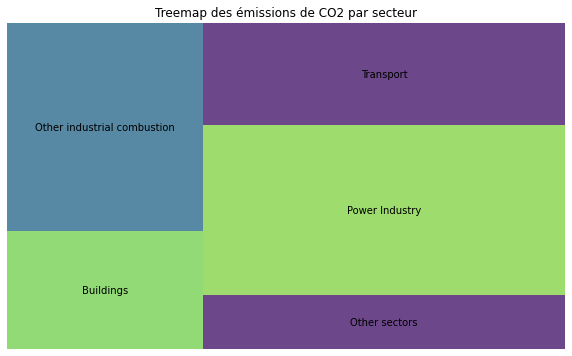

In [202]:
import squarify

#la somme totale des émissions pour chaque secteur
df6 = dataset.groupby('Sector')['CO2_Emissions'].sum()

# la structure de données pour squarify
sizes = df6.values
labels = df6.index

# Tracer le treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.title('Treemap des émissions de CO2 par secteur')
plt.show()

In [30]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-0.14.3-py3-none-any.whl.metadata (1.5 kB)
  Using cached fiona-1.9.6-cp310-cp310-manylinux2014_x86_64.whl.metadata (50 kB)
Using cached geopandas-0.14.3-py3-none-any.whl (1.1 MB)
Using cached fiona-1.9.6-cp310-cp310-manylinux2014_x86_64.whl (15.7 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [4]:
country_code = pd.read_excel('country_code.xlsx')

print(country_code.head())

# Fusionner les datasets sur la colonne country 
data = pd.merge(dataset, country_code, left_on='Country', right_on='country_name')

print(data.head())

  country_name country_code
0  Afghanistan          AFG
1      Albania          ALB
2      Algeria          DZA
3       Angola          AGO
4     Anguilla          AIA
           Sector      Country  Year  CO2_Emissions country_name country_code
0  Power Industry  Afghanistan  1970       0.055674  Afghanistan          AFG
1  Power Industry      Albania  1970       0.698291      Albania          ALB
2  Power Industry      Algeria  1970       1.646111      Algeria          DZA
3  Power Industry       Angola  1970       0.137546       Angola          AGO
4  Power Industry     Anguilla  1970       0.000430     Anguilla          AIA


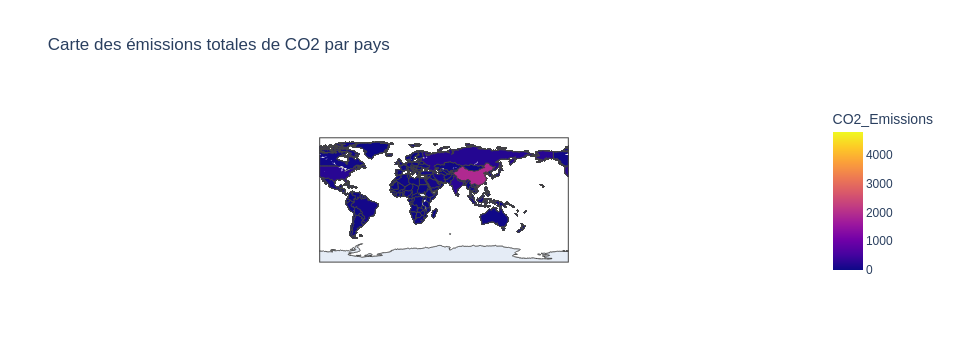

In [6]:
import plotly.express as px

df =data

#la carte des émissions totales de chaque pays
fig = px.choropleth(df, 
                    locations="country_code",  # Colonne contenant les codes ISO des pays
                    color="CO2_Emissions",  # Colonne contenant les émissions totales
                    hover_name="Country",  # Colonne à afficher lorsqu'on survole les pays
                    color_continuous_scale=px.colors.sequential.Plasma,  # Échelle de couleurs
                    title="Carte des émissions totales de CO2 par pays")  #
fig.show()

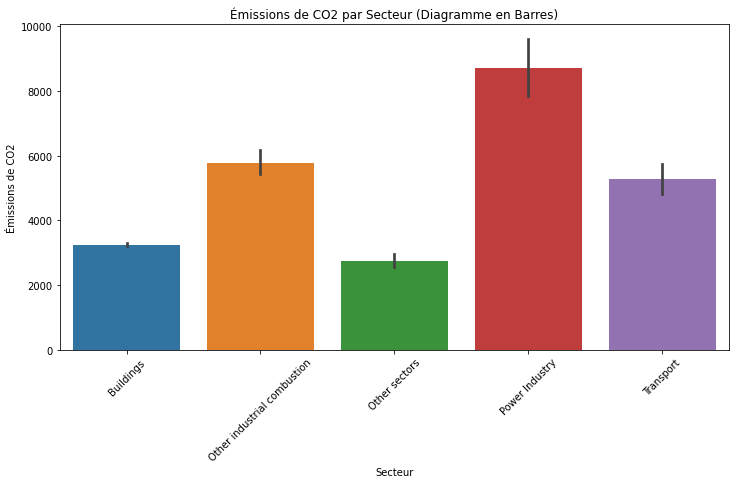

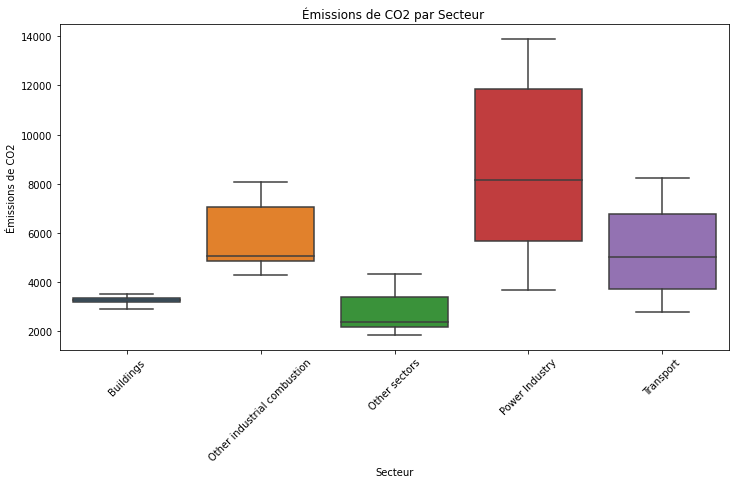

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

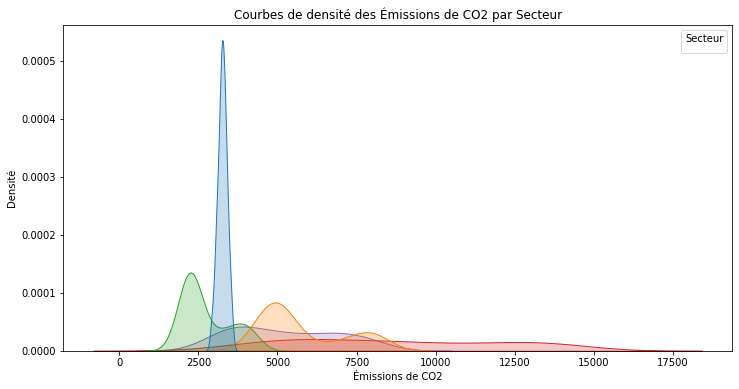

In [13]:
# Diagramme en barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Sector', y='CO2_Emissions', data=df1)
plt.title('Émissions de CO2 par Secteur (Diagramme en Barres)')
plt.xlabel('Secteur')
plt.ylabel('Émissions de CO2')
plt.xticks(rotation=45)
plt.show()

# Boîtes à moustaches
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='CO2_Emissions', data=df1)
plt.title('Émissions de CO2 par Secteur ')
plt.xlabel('Secteur')
plt.ylabel('Émissions de CO2')
plt.xticks(rotation=45)
plt.show()

# Courbes de densité
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df1, x='CO2_Emissions', hue='Sector', fill=True)
plt.title('Courbes de densité des Émissions de CO2 par Secteur')
plt.xlabel('Émissions de CO2')
plt.ylabel('Densité')
plt.legend(title='Secteur')
plt.show()

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#le modèle d'ANOVA
model = ols('CO2_Emissions ~ Sector', data=df1).fit()

# Effectuer l'ANOVA
anova_table = sm.stats.anova_lm(model, type=1)

# Afficher la table ANOVA
print(anova_table)

             df        sum_sq       mean_sq          F        PR(>F)
Sector      4.0  1.146425e+09  2.866062e+08  89.907639  3.038857e-47
Residual  250.0  7.969463e+08  3.187785e+06        NaN           NaN


In [15]:
from scipy.stats import ttest_ind

#liste pour stocker les résultats des tests t
ttest_results = []

# les catégories de la variable Sector
categories = df1['Sector'].unique()

# Boucle à travers chaque paire de catégories et effectuez un test t
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        #les échantillons correspondant à chaque paire de catégories
        sample1 = df1[df1['Sector'] == categories[i]]['CO2_Emissions']
        sample2 = df1[df1['Sector'] == categories[j]]['CO2_Emissions']
        
        #le test t pour comparer les moyennes des échantillons
        t_statistic, p_value = ttest_ind(sample1, sample2)
        
        # Ajoutez les résultats du test t à la liste
        ttest_results.append((categories[i], categories[j], t_statistic, p_value))

for result in ttest_results:
    print(f"Comparaison entre {result[0]} et {result[1]}:")
    print(f"   - Statistique t : {result[2]}")
    print(f"   - Valeur p : {result[3]}")


Comparaison entre Buildings et Other industrial combustion:
   - Statistique t : -13.673897591341085
   - Valeur p : 1.2571771792917727e-24
Comparaison entre Buildings et Other sectors:
   - Statistique t : 4.746072711367594
   - Valeur p : 6.92059822088778e-06
Comparaison entre Buildings et Power Industry:
   - Statistique t : -11.776229139567373
   - Valeur p : 1.3334422656696848e-20
Comparaison entre Buildings et Transport:
   - Statistique t : -8.759114727692497
   - Valeur p : 5.153608425414346e-14
Comparaison entre Other industrial combustion et Other sectors:
   - Statistique t : 14.333285327173181
   - Valeur p : 5.475341162756015e-26
Comparaison entre Other industrial combustion et Power Industry:
   - Statistique t : -5.9001136291790655
   - Valeur p : 4.977958157104416e-08
Comparaison entre Other industrial combustion et Transport:
   - Statistique t : 1.6917855241289093
   - Valeur p : 0.0938009089870373
Comparaison entre Other sectors et Power Industry:
   - Statistique t 

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Effectuer le test de Tukey avec correction Bonferroni
tukey_results = pairwise_tukeyhsd(df1['CO2_Emissions'], df1['Sector'], alpha=0.05)

print(tukey_results)

                         Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
           group1                      group2            meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------------------------------------------
                  Buildings Other industrial combustion  2520.6204    0.0  1549.0862  3492.1546   True
                  Buildings               Other sectors  -507.8196 0.6048 -1479.3538   463.7147  False
                  Buildings              Power Industry  5459.6408    0.0  4488.1066  6431.1751   True
                  Buildings                   Transport  2022.9547    0.0  1051.4205  2994.4889   True
Other industrial combustion               Other sectors   -3028.44    0.0 -3999.9742 -2056.9058   True
Other industrial combustion              Power Industry  2939.0204    0.0  1967.4862  3910.5547   True
Other industrial combustion                   Transport  -497.6657 0.6234